In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")
print('Libraries are imported successfully.')

Libraries are imported successfully.


In [19]:
dataset = pd.read_csv(r"Datasets\Gate2021.csv")
print(f'Dataset is successfully imported with dimensions {dataset.shape}.')

Dataset is successfully imported with dimensions (18, 9).


In [3]:
print('Take a look at the dataset.')
dataset

Take a look at the dataset.


,Sl.\nNo.,Paper Code,Avg.\nMarks (x)\n(out of\n100),Std.\ndev. (μ),Cut-off\nMarks\n(out of\n100) for\nGeneral,Cut-off Marks\n(out of 100) for\nOBC-(NCL)/EWS\n(0.9*Cut-off\nMarks for\nGeneral),Cut-off Marks\n(out of 100) for\nSC/ST/PwD\n(0.67*Cut-off\nMarks for\nGeneral),% Qualified\nCandidates,Candidates\nAppeared
0,1,AE,15.40,10.90,26.3,23.6,17.5,17.70,4914
1,2,AG,11.93,10.20,25.0,22.5,16.6,13.61,2277
2,3,AR,28.95,11.95,40.9,36.8,27.2,22.46,10857
3,4,BM,15.43,9.25,25.0,22.5,16.6,19.06,1684
4,5,BT,18.00,12.00,30.0,27.0,20.0,19.89,13186
5,6,CE*,15.30,13.90,29.2,26.2,19.4,17.45,115270
6,7,CH,19.40,15.70,35.1,31.5,23.4,20.35,16705
7,8,CS*,14.00,12.10,26.1,23.4,17.4,17.73,101922
8,9,CY,20.90,15.30,36.2,32.5,24.1,19.94,23465
9,10,EC,12.63,10.00,25.0,22.5,16.6,14.15,80629


## Data PreProcessing

In [4]:
print(f'Columns of the dataset are {dataset.columns}')

Columns of the dataset are Index(['Sl.\nNo.', 'Paper Code', 'Avg.\nMarks (x)\n(out of\n100)',
       'Std.\ndev. (μ)', 'Cut-off\nMarks\n(out of\n100) for\nGeneral',
       'Cut-off Marks\n(out of 100) for\nOBC-(NCL)/EWS\n(0.9*Cut-off\nMarks for\nGeneral)',
       'Cut-off Marks\n(out of 100) for\nSC/ST/PwD\n(0.67*Cut-off\nMarks for\nGeneral)',
       '% Qualified\nCandidates', 'Candidates\nAppeared'],
      dtype='object')


As we can see column names are not easy to manipulate, hence lets change them to something short and meaningful.

In [5]:
dataset.columns = ['SNo','PaperCode','AvgMarks','StdDev','CutOffMarksGen','CutOffMarksOBC','CutOffMarksPwd','QualifiedCandidates','CandidatesAppeared']

In [6]:
dataset.head()

,SNo,PaperCode,AvgMarks,StdDev,CutOffMarksGen,CutOffMarksOBC,CutOffMarksPwd,QualifiedCandidates,CandidatesAppeared
0,1,AE,15.40,10.90,26.3,23.6,17.5,17.70,4914
1,2,AG,11.93,10.20,25.0,22.5,16.6,13.61,2277
2,3,AR,28.95,11.95,40.9,36.8,27.2,22.46,10857
3,4,BM,15.43,9.25,25.0,22.5,16.6,19.06,1684
4,5,BT,18.00,12.00,30.0,27.0,20.0,19.89,13186


#### For understanding clustering, we will take PaperCode and AvgMarks columns and will see how K-Means and Hierarchial clustering helps in arranging them in groups.

Since, the PaperCode column is string, lets write a utility function to convert to numeric so that algorithms can be applied.

In [7]:
def convert_paper_code_to_numeric(paperCode):
    if paperCode == 'AE':
        return 1
    elif paperCode == 'AG':
        return 2
    elif paperCode == 'AR':
        return 3
    elif paperCode == 'BM':
        return 4
    elif paperCode == 'BT':
        return 5
    elif paperCode == 'CE*':
        return 6
    elif paperCode == 'CH':
        return 7
    elif paperCode == 'CS*':
        return 8
    elif paperCode == 'CY':
        return 9
    elif paperCode == 'EC':
        return 10
    elif paperCode == 'EE':
        return 11
    elif paperCode == 'ES':
        return 12
    elif paperCode == 'EY':
        return 13
    elif paperCode == 'GG (Geology)':
        return 14
    elif paperCode == 'GG (Geophysics)':
        return 15
    elif paperCode == 'IN':
        return 16
    elif paperCode == 'MA':
        return 17
    else:
        return 18

In [8]:
dataset['PaperCode'] = dataset.PaperCode.apply(lambda paperCode : convert_paper_code_to_numeric(paperCode))

In [9]:
dataset.head()

,SNo,PaperCode,AvgMarks,StdDev,CutOffMarksGen,CutOffMarksOBC,CutOffMarksPwd,QualifiedCandidates,CandidatesAppeared
0,1,1,15.40,10.90,26.3,23.6,17.5,17.70,4914
1,2,2,11.93,10.20,25.0,22.5,16.6,13.61,2277
2,3,3,28.95,11.95,40.9,36.8,27.2,22.46,10857
3,4,4,15.43,9.25,25.0,22.5,16.6,19.06,1684
4,5,5,18.00,12.00,30.0,27.0,20.0,19.89,13186


Cool! The dataset is processed and we are good to proceed with applying the algorithms.

Visualize the available datapoints using scatter plot


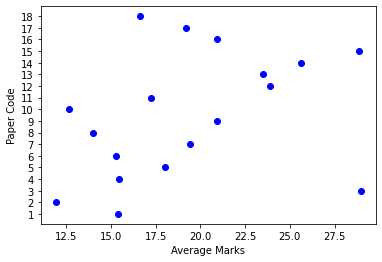

In [10]:
print('Visualize the available datapoints using scatter plot')
X = dataset[["AvgMarks","PaperCode"]]
#Visualise data points
plt.scatter(X["AvgMarks"],X["PaperCode"],c='blue')
plt.xlabel('Average Marks')
plt.ylabel('Paper Code')
plt.yticks(range(1,19))
plt.show()

## K-Means Algorithm.

In K-Means, we need to specify the optimum number of clusters which can be found by the algorithm. A reliable way of doing it is by plotting Elbow Graph.
Let's try to see what is the Within-Cluster-Sum-of-Squares(WCSS) for different clusters which can exists in the dataset.

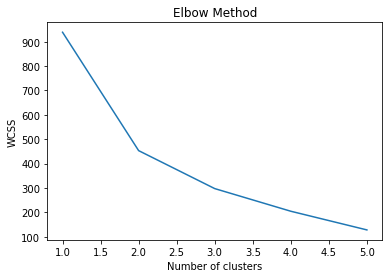

In [11]:
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We are seeing steep decline in WCSS for 2 to 3, so it seems that 3 could be best possible number of clusters available in the dataset.

Cluster Centers for 2 clusters - [[23.16       13.        ]
 [15.48333333  6.        ]]


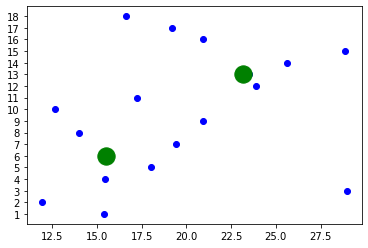

Cluster Centers for 3 clusters - [[18.5        15.5       ]
 [15.26125     5.375     ]
 [25.28333333 11.        ]]


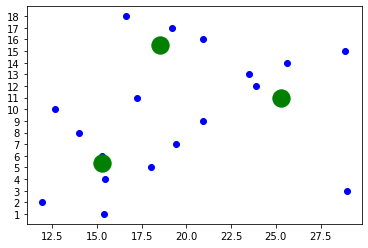

Cluster Centers for 4 clusters - [[18.5     15.5    ]
 [15.26125  5.375  ]
 [24.55    12.6    ]
 [28.95     3.     ]]


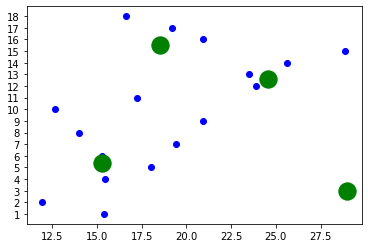

In [12]:
for cluster in range(2,5):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=0)
    pred_y = kmeans.fit_predict(X)
    print(f'Cluster Centers for {cluster} clusters - {kmeans.cluster_centers_}')
    plt.scatter(X["AvgMarks"],X["PaperCode"],c='blue')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green')
    plt.yticks(range(1,19))
    plt.show()

## Hierarchial Clustering Algorithm.

In case of hierarchial clustering, we can use Dendogram to find the optimum number of clusters.

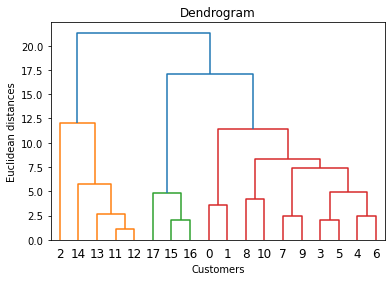

In [13]:
Y = X[['PaperCode','AvgMarks']]

dendrogram = sch.dendrogram(sch.linkage(X, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [14]:
hierarchial_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
clusters=hierarchial_clustering.fit_predict(Y[['PaperCode','AvgMarks']])

In [15]:
Y['Cluster'] = clusters

In [16]:
Y

,PaperCode,AvgMarks,Cluster
0,1,15.40,1
1,2,11.93,1
2,3,28.95,2
3,4,15.43,1
4,5,18.00,1
5,6,15.30,1
6,7,19.40,1
7,8,14.00,1
8,9,20.90,1
9,10,12.63,1


In [17]:
Y.columns = [0,1,2]

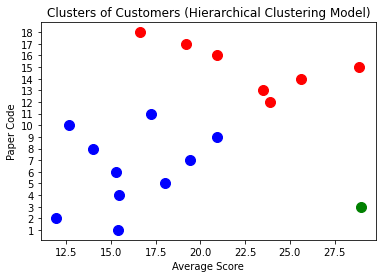

In [18]:
plt.scatter(Y[clusters==0][1], Y[clusters==0][0], s=100, c='red', label ='Cluster 1')
plt.scatter(Y[clusters==1][1], Y[clusters==1][0], s=100, c='blue', label ='Cluster 2')
plt.scatter(Y[clusters==2][1], Y[clusters==2][0], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Average Score')
plt.ylabel('Paper Code')
plt.yticks(range(1,19))
plt.show()